In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [3]:
from common.utils.image_preprocess import (
    get_slide_filename_from_image_id, get_mask_filename_from_image_id,
    read_slide, read_slide_partitions, read_slide_partition_file, read_mask_partition_file
)

In [4]:
import os
from openslide import open_slide
import matplotlib.pyplot as plt
import math
import numpy as np
from PIL import Image
from glob import glob
import pandas as pd
from tqdm import tqdm

In [5]:
meta_info = pd.read_pickle('../../../data/tumor_img_meta_info.pkl')

In [6]:
meta_info.head()

,img_id,level_5_img_size,level_5_mask_area,level_dimensions,level_downsamples,mask_img_filename,mask_proportion,slide_img_filename
0,001,21123072,11116,"((97792, 221184), (48896, 110592), (24448, 552...","(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, ...",tumor_001_mask.tif,0.052625,tumor_001.tif
1,002,20976384,938,"((97792, 219648), (48896, 109824), (24448, 549...","(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, ...",tumor_002_mask.tif,0.004472,tumor_002.tif
2,005,20976384,2323,"((97792, 219648), (48896, 109824), (24448, 549...","(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, ...",tumor_005_mask.tif,0.011074,tumor_005.tif
3,012,20585216,1115,"((97792, 215552), (48896, 107776), (24448, 538...","(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, ...",tumor_012_mask.tif,0.005417,tumor_012.tif
4,016,21123072,156981,"((97792, 221184), (48896, 110592), (24448, 552...","(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, ...",tumor_016_mask.tif,0.743173,tumor_016.tif


In [7]:
SOURCE_IMG_DATA_DIR = '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/source_data/'
PARTITIONED_IMG_DATA_DIR = '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/'

In [8]:
ZOOM_LEVEL = 5
PARTITION_WIDTH = 60
PARTITION_HEIGHT = 60

In [9]:
for idx, row in tqdm(meta_info.iterrows()):
    slide_img_file_path = os.path.join(SOURCE_IMG_DATA_DIR, row['slide_img_filename'])
    mask_img_file_path = os.path.join(SOURCE_IMG_DATA_DIR, row['mask_img_filename'])
    
    slide = open_slide(slide_img_file_path)
    mask = open_slide(mask_img_file_path)
    
    img_id = row['img_id']
    slide_img_partition_file_prefix = os.path.join(PARTITIONED_IMG_DATA_DIR, 'tumor_slide_{}_split'.format(img_id))
    mask_img_partition_file_prefix = os.path.join(PARTITIONED_IMG_DATA_DIR, 'tumor_mask_{}_split'.format(img_id))
    
    partitions_slide = read_slide_partitions(
        slide,
        ZOOM_LEVEL,
        partition_width=PARTITION_WIDTH,
        partition_height=PARTITION_HEIGHT,
        save_mode=True,
        save_file_prefix=slide_img_partition_file_prefix
    )
    partitions_mask = read_slide_partitions(
        mask,
        ZOOM_LEVEL,
        partition_width=PARTITION_WIDTH,
        partition_height=PARTITION_HEIGHT,
        save_mode=True,
        is_mask=True,
        save_file_prefix=mask_img_partition_file_prefix
    )

0it [00:00, ?it/s]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_001_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_001_split_{row_id}_{col_id}.npy


1it [00:05,  5.56s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_002_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_002_split_{row_id}_{col_id}.npy


2it [00:09,  5.17s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_005_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_005_split_{row_id}_{col_id}.npy


3it [00:13,  4.85s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_012_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_012_split_{row_id}_{col_id}.npy


4it [00:17,  4.60s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_016_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_016_split_{row_id}_{col_id}.npy


5it [00:22,  4.47s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_019_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_019_split_{row_id}_{col_id}.npy


6it [00:26,  4.41s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_023_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_023_split_{row_id}_{col_id}.npy


7it [00:30,  4.39s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_031_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_031_split_{row_id}_{col_id}.npy


8it [00:34,  4.34s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_035_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_035_split_{row_id}_{col_id}.npy


9it [00:39,  4.41s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_057_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_057_split_{row_id}_{col_id}.npy


10it [00:44,  4.48s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_059_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_059_split_{row_id}_{col_id}.npy


11it [00:48,  4.46s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_064_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_064_split_{row_id}_{col_id}.npy


12it [00:53,  4.52s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_075_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_075_split_{row_id}_{col_id}.npy


13it [00:54,  3.63s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_078_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_078_split_{row_id}_{col_id}.npy


14it [00:57,  3.27s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_081_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_081_split_{row_id}_{col_id}.npy


15it [00:59,  2.90s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_084_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_084_split_{row_id}_{col_id}.npy


16it [01:00,  2.44s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_091_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_091_split_{row_id}_{col_id}.npy


17it [01:01,  1.94s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_094_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_094_split_{row_id}_{col_id}.npy


18it [01:04,  2.18s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_096_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_096_split_{row_id}_{col_id}.npy


19it [01:06,  2.12s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_101_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_101_split_{row_id}_{col_id}.npy


20it [01:08,  2.14s/it]

Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_slide_110_split_{row_id}_{col_id}.png
Saving under the file name patterns:  /home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/temp_partitions_dir/tumor_mask_110_split_{row_id}_{col_id}.npy


21it [01:09,  1.95s/it]


### Sanity Check

In [15]:
for idx, row in meta_info.iterrows():
    img_id = row['img_id']
    
    slide_img_partition_file_prefix = os.path.join(PARTITIONED_IMG_DATA_DIR, 'tumor_slide_{}_split'.format(img_id))
    mask_img_partition_file_prefix = os.path.join(PARTITIONED_IMG_DATA_DIR, 'tumor_mask_{}_split'.format(img_id))
    slide_img_partition_files = glob(slide_img_partition_file_prefix + '*.png')
    mask_img_partition_files = glob(mask_img_partition_file_prefix + '*.npy')
    
    assert len(slide_img_partition_files) == len(mask_img_partition_files)
    
    print('Img ID {}: {} number of partitions'.format(img_id, len(slide_img_partition_files)))

Img ID 001: 5750 number of partitions
Img ID 002: 5700 number of partitions
Img ID 005: 5700 number of partitions
Img ID 012: 5600 number of partitions
Img ID 016: 5750 number of partitions
Img ID 019: 5700 number of partitions
Img ID 023: 5750 number of partitions
Img ID 031: 5750 number of partitions
Img ID 035: 5750 number of partitions
Img ID 057: 5700 number of partitions
Img ID 059: 5750 number of partitions
Img ID 064: 5700 number of partitions
Img ID 075: 1886 number of partitions
Img ID 078: 2793 number of partitions
Img ID 081: 2392 number of partitions
Img ID 084: 1496 number of partitions
Img ID 091: 896 number of partitions
Img ID 094: 3172 number of partitions
Img ID 096: 2516 number of partitions
Img ID 101: 2664 number of partitions
Img ID 110: 1813 number of partitions


### Plot Image 001 as an example

In [39]:
sample_img_file = meta_info.iloc[0]['slide_img_filename']
sample_mask_file = meta_info.iloc[0]['mask_img_filename']
sample_img_id = '001'

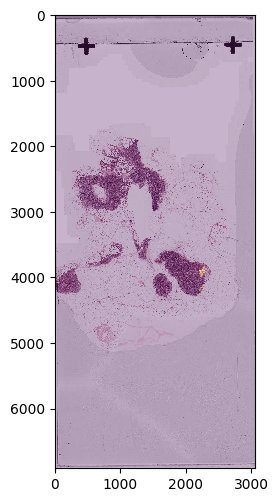

In [43]:
slide = open_slide(os.path.join(SOURCE_IMG_DATA_DIR, sample_img_file))
mask = open_slide(os.path.join(SOURCE_IMG_DATA_DIR, sample_mask_file))

slide_image = read_slide(slide, 
                         x=0, 
                         y=0, 
                         level=5, 
                         width=slide.level_dimensions[5][0], 
                         height=slide.level_dimensions[5][1])
mask_image = read_slide(mask, 
                         x=0, 
                         y=0, 
                         level=5, 
                         width=slide.level_dimensions[5][0], 
                         height=slide.level_dimensions[5][1])[:, :, 0]
plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(slide_image)
plt.imshow(mask_image, alpha=0.3)

In [23]:
sample_slide_file_prefix = os.path.join(PARTITIONED_IMG_DATA_DIR, 'tumor_slide_{}_split'.format(sample_img_id))
sample_mask_file_prefix = os.path.join(PARTITIONED_IMG_DATA_DIR, 'tumor_mask_{}_split'.format(sample_img_id))

In [24]:
partition_slide_files = glob(sample_slide_file_prefix + '*.png')
partition_mask_files = glob(sample_mask_file_prefix + '*.npy')

In [32]:
def get_split_dimensions_from_partition_files(partition_files):
    rows = np.unique([x.split('.')[0].split('_')[-2] for x in partition_files])
    cols = np.unique([x.split('.')[0].split('_')[-1] for x in partition_files])
    return (len(rows), len(cols))

def plot_partition_file_paths(plot_axes, 
                              file_path_format, 
                              is_mask=False,
                              alpha=None):
    n_rows, n_cols = plot_axes.shape
    
    for i in range(n_rows):
        for j in range(n_cols):
            file_path = file_path_format.format(i, j)
            if is_mask:
                img_arr = read_mask_partition_file(file_path)
            else:
                img_arr = read_slide_partition_file(file_path)
            
            if alpha is None:
                plot_axes[i, j].imshow(img_arr)
            else:
                plot_axes[i, j].imshow(img_arr, alpha=alpha)
                
def plot_partition_file_paths_with_range(plot_axes, 
                                         file_path_format, 
                                         x_idx_range,
                                         y_idx_range,
                                         is_mask=False,
                                         alpha=None):
    x_min, x_max = x_idx_range
    y_min, y_max = y_idx_range
    
    for i in range(x_min, x_max):
        for j in range(y_min, y_max):
            file_path = file_path_format.format(i, j)
            if is_mask:
                img_arr = read_mask_partition_file(file_path)
            else:
                img_arr = read_slide_partition_file(file_path)
            
            if alpha is None:
                plot_axes[i - x_min, j - y_min].imshow(img_arr)
            else:
                plot_axes[i - x_min, j - y_min].imshow(img_arr, alpha=alpha)

In [33]:
partition_dims = get_split_dimensions_from_partition_files(partition_slide_files)

In [34]:
partition_dims

(115, 50)

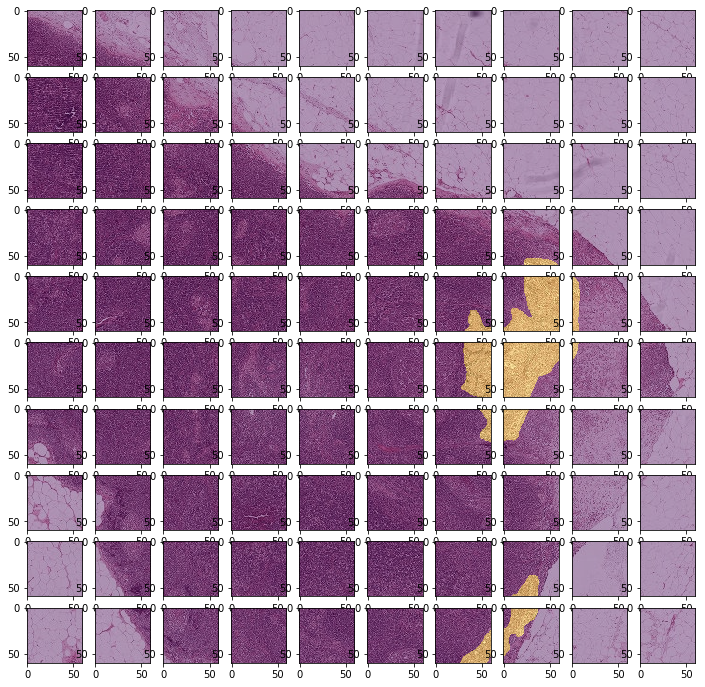

In [44]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
plot_partition_file_paths_with_range(axes, 
                                     sample_slide_file_prefix + '_{}_{}.png',
                                     (60, 70),
                                     (30, 40),
                                    )
plot_partition_file_paths_with_range(axes, 
                                     sample_mask_file_prefix + '_{}_{}.npy',
                                     (60, 70),
                                     (30, 40),
                                     is_mask=True,
                                     alpha=0.4
                                    )